In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2, os

Using TensorFlow backend.


In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass.csv


In [0]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,1
1,2,DSCF0900.JPG,800,specialty,1
2,3,DSCF0904.JPG,1250,specialty,1
3,4,DSCF0905.JPG,400,specialty,1
4,5,DSCF0910.JPG,800,specialty,1
...,...,...,...,...,...
535,536,DSCF1724.JPG,800,exchange,3
536,537,DSCF1725.JPG,1250,exchange,3
537,538,DSCF1726.JPG,400,exchange,3
538,539,DSCF1727.JPG,800,exchange,3


In [0]:
width = 265#1920#530#265
height = 149#1024#298#149

In [0]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
arrayImages = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  #img = np.array(img)
  image_list.append(img)
  img = np.array(img)
  arrayImages.append(img)

label = dtLabel['label']

  0%|          | 0/540 [00:00<?, ?it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75543189E8>


  0%|          | 1/540 [00:03<33:34,  3.74s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A98160>


  0%|          | 2/540 [00:04<25:37,  2.86s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A98160>


  1%|          | 3/540 [00:05<21:04,  2.35s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A99DD8>


  1%|          | 4/540 [00:06<16:48,  1.88s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A99DD8>


  1%|          | 5/540 [00:07<13:59,  1.57s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A99DD8>


  1%|          | 6/540 [00:09<14:35,  1.64s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A9E748>


  1%|▏         | 7/540 [00:09<12:18,  1.38s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A9E748>


  1%|▏         | 8/540 [00:10<10:33,  1.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A9E748>


  2%|▏         | 9/540 [00:11<09:49,  1.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F759DE08C50>


  2%|▏         | 10/540 [00:12<09:04,  1.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553AA9630>


  2%|▏         | 11/540 [00:13<08:45,  1.01it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A9E2B0>


  2%|▏         | 12/540 [00:14<08:17,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553AA7860>


  2%|▏         | 13/540 [00:14<07:23,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553AA5EF0>


  3%|▎         | 14/540 [00:15<07:28,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553AAC9E8>


  3%|▎         | 15/540 [00:16<07:18,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553AA5EF0>


  3%|▎         | 16/540 [00:17<07:14,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A2E828>


  3%|▎         | 17/540 [00:18<07:07,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A2E828>


  3%|▎         | 18/540 [00:19<08:12,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553AAC9E8>


  4%|▎         | 19/540 [00:20<07:46,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A37320>


  4%|▎         | 20/540 [00:20<07:23,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553AAC9E8>


  4%|▍         | 21/540 [00:21<07:00,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553AAC9E8>


  4%|▍         | 22/540 [00:22<06:44,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A36D68>


  4%|▍         | 23/540 [00:23<06:49,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A366A0>


  4%|▍         | 24/540 [00:24<07:22,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3AFD0>


  5%|▍         | 25/540 [00:24<07:07,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3A908>


  5%|▍         | 26/540 [00:25<06:48,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3AEB8>


  5%|▌         | 27/540 [00:26<06:57,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3AD68>


  5%|▌         | 28/540 [00:27<06:48,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3AF28>


  5%|▌         | 29/540 [00:27<06:36,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3AA90>


  6%|▌         | 30/540 [00:28<06:39,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3AB38>


  6%|▌         | 31/540 [00:29<06:36,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3AA20>


  6%|▌         | 32/540 [00:30<06:43,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3AA20>


  6%|▌         | 33/540 [00:31<06:40,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3AE48>


  6%|▋         | 34/540 [00:31<06:48,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3ACF8>


  6%|▋         | 35/540 [00:32<06:38,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3ACF8>


  7%|▋         | 36/540 [00:33<06:48,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A3A0F0>


  7%|▋         | 37/540 [00:34<06:31,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A397F0>


  7%|▋         | 38/540 [00:34<06:24,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39BA8>


  7%|▋         | 39/540 [00:35<06:15,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39C88>


  7%|▋         | 40/540 [00:36<06:11,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39DD8>


  8%|▊         | 41/540 [00:37<06:01,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39AC8>


  8%|▊         | 42/540 [00:37<05:41,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A397F0>


  8%|▊         | 43/540 [00:38<05:56,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39BA8>


  8%|▊         | 44/540 [00:39<05:55,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A399E8>


  8%|▊         | 45/540 [00:39<05:36,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A399E8>


  9%|▊         | 46/540 [00:40<05:38,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39FD0>


  9%|▊         | 47/540 [00:41<05:51,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A390B8>


  9%|▉         | 48/540 [00:42<05:56,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39E48>


  9%|▉         | 49/540 [00:42<05:29,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39908>


  9%|▉         | 50/540 [00:43<05:36,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39390>


  9%|▉         | 51/540 [00:44<05:50,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39390>


 10%|▉         | 52/540 [00:44<05:55,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39390>


 10%|▉         | 53/540 [00:45<06:00,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39780>


 10%|█         | 54/540 [00:46<05:57,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39940>


 10%|█         | 55/540 [00:47<05:59,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39550>


 10%|█         | 56/540 [00:47<05:57,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A390B8>


 11%|█         | 57/540 [00:48<05:57,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39518>


 11%|█         | 58/540 [00:49<05:49,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39400>


 11%|█         | 59/540 [00:50<05:57,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A397B8>


 11%|█         | 60/540 [00:50<05:54,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A393C8>


 11%|█▏        | 61/540 [00:51<05:51,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A393C8>


 11%|█▏        | 62/540 [00:52<05:43,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A399B0>


 12%|█▏        | 63/540 [00:52<05:47,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39470>


 12%|█▏        | 64/540 [00:53<05:47,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39780>


 12%|█▏        | 65/540 [00:54<05:49,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39A90>


 12%|█▏        | 66/540 [00:55<05:53,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A394A8>


 12%|█▏        | 67/540 [00:55<05:50,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A394A8>


 13%|█▎        | 68/540 [00:56<05:50,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39828>


 13%|█▎        | 69/540 [00:57<06:51,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A39BA8>


 13%|█▎        | 70/540 [00:58<06:33,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40BA8>


 13%|█▎        | 71/540 [00:59<06:16,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40940>


 13%|█▎        | 72/540 [01:00<06:16,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A409B0>


 14%|█▎        | 73/540 [01:00<06:11,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40BA8>


 14%|█▎        | 74/540 [01:01<06:02,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A407F0>


 14%|█▍        | 75/540 [01:02<06:00,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40390>


 14%|█▍        | 76/540 [01:03<05:59,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40518>


 14%|█▍        | 77/540 [01:04<06:09,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A406D8>


 14%|█▍        | 78/540 [01:04<06:10,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40BA8>


 15%|█▍        | 79/540 [01:05<06:24,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40D30>


 15%|█▍        | 80/540 [01:06<06:18,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40748>


 15%|█▌        | 81/540 [01:07<06:17,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A409E8>


 15%|█▌        | 82/540 [01:08<06:22,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A404A8>


 15%|█▌        | 83/540 [01:08<06:14,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40A20>


 16%|█▌        | 84/540 [01:09<06:17,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40198>


 16%|█▌        | 85/540 [01:10<06:12,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40A58>


 16%|█▌        | 86/540 [01:11<06:01,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40C88>


 16%|█▌        | 87/540 [01:12<06:04,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40F28>


 16%|█▋        | 88/540 [01:13<06:07,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40198>


 16%|█▋        | 89/540 [01:13<06:06,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40F60>


 17%|█▋        | 90/540 [01:14<06:12,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A405C0>


 17%|█▋        | 91/540 [01:15<06:03,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A408D0>


 17%|█▋        | 92/540 [01:16<06:07,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40F60>


 17%|█▋        | 93/540 [01:17<06:01,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40F60>


 17%|█▋        | 94/540 [01:17<05:56,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A400B8>


 18%|█▊        | 95/540 [01:18<06:04,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40550>


 18%|█▊        | 96/540 [01:19<05:44,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A406A0>


 18%|█▊        | 97/540 [01:20<05:57,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40908>


 18%|█▊        | 98/540 [01:21<05:53,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40908>


 18%|█▊        | 99/540 [01:21<05:53,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40358>


 19%|█▊        | 100/540 [01:22<05:50,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40358>


 19%|█▊        | 101/540 [01:23<05:48,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A404A8>


 19%|█▉        | 102/540 [01:24<06:04,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A407B8>


 19%|█▉        | 103/540 [01:25<05:52,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A407B8>


 19%|█▉        | 104/540 [01:25<05:51,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A407B8>


 19%|█▉        | 105/540 [01:26<05:50,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A40048>


 20%|█▉        | 106/540 [01:27<05:50,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49D30>


 20%|█▉        | 107/540 [01:28<05:52,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49358>


 20%|██        | 108/540 [01:29<05:57,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49048>


 20%|██        | 109/540 [01:30<05:54,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A496D8>


 20%|██        | 110/540 [01:31<06:09,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A496D8>


 21%|██        | 111/540 [01:31<06:11,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49EF0>


 21%|██        | 112/540 [01:32<05:53,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49B38>


 21%|██        | 113/540 [01:33<05:44,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49B38>


 21%|██        | 114/540 [01:34<05:46,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49AC8>


 21%|██▏       | 115/540 [01:35<05:43,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49BA8>


 21%|██▏       | 116/540 [01:35<05:57,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A495F8>


 22%|██▏       | 117/540 [01:36<05:55,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49C18>


 22%|██▏       | 118/540 [01:37<05:46,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49828>


 22%|██▏       | 119/540 [01:38<05:41,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49F60>


 22%|██▏       | 120/540 [01:39<05:43,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A496D8>


 22%|██▏       | 121/540 [01:40<05:46,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49D68>


 23%|██▎       | 122/540 [01:40<05:39,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49940>


 23%|██▎       | 123/540 [01:41<05:37,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A496D8>


 23%|██▎       | 124/540 [01:42<05:34,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49E80>


 23%|██▎       | 125/540 [01:43<05:35,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A497B8>


 23%|██▎       | 126/540 [01:44<05:35,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49668>


 24%|██▎       | 127/540 [01:44<05:32,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A496D8>


 24%|██▎       | 128/540 [01:45<05:23,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49588>


 24%|██▍       | 129/540 [01:46<05:13,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49F28>


 24%|██▍       | 130/540 [01:46<05:08,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49550>


 24%|██▍       | 131/540 [01:47<04:45,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49908>


 24%|██▍       | 132/540 [01:48<04:28,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A496D8>


 25%|██▍       | 133/540 [01:48<04:27,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49278>


 25%|██▍       | 134/540 [01:49<04:27,  1.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49BA8>


 25%|██▌       | 135/540 [01:50<04:34,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49BA8>


 25%|██▌       | 136/540 [01:52<08:02,  1.20s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49A20>


 25%|██▌       | 137/540 [01:53<07:10,  1.07s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A497B8>


 26%|██▌       | 138/540 [01:54<06:33,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49390>


 26%|██▌       | 139/540 [01:54<06:04,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49A20>


 26%|██▌       | 140/540 [01:55<05:44,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49A20>


 26%|██▌       | 141/540 [01:56<05:24,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A49780>


 26%|██▋       | 142/540 [01:56<04:52,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53208>


 26%|██▋       | 143/540 [01:57<04:57,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53908>


 27%|██▋       | 144/540 [01:58<04:54,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53DA0>


 27%|██▋       | 145/540 [01:59<05:10,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A537B8>


 27%|██▋       | 146/540 [02:00<05:11,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53908>


 27%|██▋       | 147/540 [02:00<05:01,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A537B8>


 27%|██▋       | 148/540 [02:01<05:03,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53AC8>


 28%|██▊       | 149/540 [02:02<05:40,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A534E0>


 28%|██▊       | 150/540 [02:03<05:37,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53780>


 28%|██▊       | 151/540 [02:04<05:24,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A534E0>


 28%|██▊       | 152/540 [02:04<04:52,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A534E0>


 28%|██▊       | 153/540 [02:05<04:49,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A531D0>


 29%|██▊       | 154/540 [02:06<04:54,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53F60>


 29%|██▊       | 155/540 [02:07<04:52,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53128>


 29%|██▉       | 156/540 [02:07<04:44,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53128>


 29%|██▉       | 157/540 [02:08<04:45,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53438>


 29%|██▉       | 158/540 [02:09<04:54,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53780>


 29%|██▉       | 159/540 [02:10<05:08,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53D68>


 30%|██▉       | 160/540 [02:11<04:57,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53DA0>


 30%|██▉       | 161/540 [02:11<04:35,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53198>


 30%|███       | 162/540 [02:12<04:40,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53A90>


 30%|███       | 163/540 [02:13<04:43,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53278>


 30%|███       | 164/540 [02:13<04:35,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53198>


 31%|███       | 165/540 [02:14<04:31,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53A20>


 31%|███       | 166/540 [02:15<04:37,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53518>


 31%|███       | 167/540 [02:16<04:35,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53940>


 31%|███       | 168/540 [02:17<05:03,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A530F0>


 31%|███▏      | 169/540 [02:17<04:56,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53A20>


 31%|███▏      | 170/540 [02:18<04:56,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53CF8>


 32%|███▏      | 171/540 [02:19<04:40,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53780>


 32%|███▏      | 172/540 [02:19<04:19,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53588>


 32%|███▏      | 173/540 [02:20<04:16,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53CC0>


 32%|███▏      | 174/540 [02:21<04:23,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53518>


 32%|███▏      | 175/540 [02:22<04:21,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53518>


 33%|███▎      | 176/540 [02:22<04:22,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53518>


 33%|███▎      | 177/540 [02:23<04:25,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A53940>


 33%|███▎      | 178/540 [02:24<04:17,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65940>


 33%|███▎      | 179/540 [02:25<04:28,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65940>


 33%|███▎      | 180/540 [02:25<04:30,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65D68>


 34%|███▎      | 181/540 [02:26<04:36,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65160>


 34%|███▎      | 182/540 [02:27<04:33,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65B38>


 34%|███▍      | 183/540 [02:28<05:06,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65320>


 34%|███▍      | 184/540 [02:29<04:50,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65C88>


 34%|███▍      | 185/540 [02:29<04:37,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65860>


 34%|███▍      | 186/540 [02:30<04:16,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65C18>


 35%|███▍      | 187/540 [02:31<04:19,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65C18>


 35%|███▍      | 188/540 [02:32<04:27,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65860>


 35%|███▌      | 189/540 [02:32<04:02,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65518>


 35%|███▌      | 190/540 [02:33<04:10,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65CC0>


 35%|███▌      | 191/540 [02:34<04:24,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A650F0>


 36%|███▌      | 192/540 [02:35<04:32,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65518>


 36%|███▌      | 193/540 [02:35<04:34,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65FD0>


 36%|███▌      | 194/540 [02:36<04:32,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65CC0>


 36%|███▌      | 195/540 [02:37<04:22,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65CF8>


 36%|███▋      | 196/540 [02:38<04:19,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65438>


 36%|███▋      | 197/540 [02:38<03:58,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65F98>


 37%|███▋      | 198/540 [02:39<04:04,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65F98>


 37%|███▋      | 199/540 [02:40<04:02,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65E48>


 37%|███▋      | 200/540 [02:40<04:07,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65CF8>


 37%|███▋      | 201/540 [02:41<04:06,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65E10>


 37%|███▋      | 202/540 [02:42<04:13,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65588>


 38%|███▊      | 203/540 [02:43<04:04,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65CF8>


 38%|███▊      | 204/540 [02:43<04:07,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65D68>


 38%|███▊      | 205/540 [02:44<04:13,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65358>


 38%|███▊      | 206/540 [02:45<03:49,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A650F0>


 38%|███▊      | 207/540 [02:45<03:38,  1.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A650F0>


 39%|███▊      | 208/540 [02:46<04:05,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A651D0>


 39%|███▊      | 209/540 [02:47<04:03,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65F98>


 39%|███▉      | 210/540 [02:47<03:50,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65128>


 39%|███▉      | 211/540 [02:48<03:40,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65128>


 39%|███▉      | 212/540 [02:49<04:38,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A65128>


 39%|███▉      | 213/540 [02:50<04:26,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A652B0>


 40%|███▉      | 214/540 [02:51<04:22,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A635F8>


 40%|███▉      | 215/540 [02:52<04:06,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A639E8>


 40%|████      | 216/540 [02:52<04:04,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63D68>


 40%|████      | 217/540 [02:53<03:57,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63B38>


 40%|████      | 218/540 [02:54<03:57,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63128>


 41%|████      | 219/540 [02:54<03:58,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63278>


 41%|████      | 220/540 [02:55<03:58,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63278>


 41%|████      | 221/540 [02:56<03:57,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63048>


 41%|████      | 222/540 [02:57<04:01,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63B38>


 41%|████▏     | 223/540 [02:57<03:55,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63208>


 41%|████▏     | 224/540 [02:58<03:56,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63BA8>


 42%|████▏     | 225/540 [02:59<04:01,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63208>


 42%|████▏     | 226/540 [03:00<04:08,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A632E8>


 42%|████▏     | 227/540 [03:01<04:03,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A630B8>


 42%|████▏     | 228/540 [03:01<04:03,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63470>


 42%|████▏     | 229/540 [03:02<04:00,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63DA0>


 43%|████▎     | 230/540 [03:04<04:58,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63DA0>


 43%|████▎     | 231/540 [03:04<04:46,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A630B8>


 43%|████▎     | 232/540 [03:05<04:37,  1.11it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A630B8>


 43%|████▎     | 233/540 [03:06<04:18,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63C18>


 43%|████▎     | 234/540 [03:07<04:07,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63828>


 44%|████▎     | 235/540 [03:07<03:57,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63EF0>


 44%|████▎     | 236/540 [03:08<04:01,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63EF0>


 44%|████▍     | 237/540 [03:09<04:02,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63A90>


 44%|████▍     | 238/540 [03:10<03:53,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63B70>


 44%|████▍     | 239/540 [03:11<04:15,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A634A8>


 44%|████▍     | 240/540 [03:11<04:01,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63630>


 45%|████▍     | 241/540 [03:12<03:57,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63A90>


 45%|████▍     | 242/540 [03:13<03:55,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63A90>


 45%|████▌     | 243/540 [03:14<03:54,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63828>


 45%|████▌     | 244/540 [03:15<04:04,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63E80>


 45%|████▌     | 245/540 [03:15<03:57,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63C50>


 46%|████▌     | 246/540 [03:16<03:51,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63C50>


 46%|████▌     | 247/540 [03:17<03:42,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63C50>


 46%|████▌     | 248/540 [03:18<03:43,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A632B0>


 46%|████▌     | 249/540 [03:18<03:35,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A63DA0>


 46%|████▋     | 250/540 [03:19<03:19,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5400>


 46%|████▋     | 251/540 [03:20<03:27,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5400>


 47%|████▋     | 252/540 [03:21<03:34,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5780>


 47%|████▋     | 253/540 [03:21<03:29,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5550>


 47%|████▋     | 254/540 [03:22<03:29,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F58D0>


 47%|████▋     | 255/540 [03:23<03:32,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5400>


 47%|████▋     | 256/540 [03:23<03:28,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5908>


 48%|████▊     | 257/540 [03:24<03:30,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5780>


 48%|████▊     | 258/540 [03:25<03:32,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5358>


 48%|████▊     | 259/540 [03:26<03:26,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5E10>


 48%|████▊     | 260/540 [03:27<03:38,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5E10>


 48%|████▊     | 261/540 [03:27<03:32,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5E10>


 49%|████▊     | 262/540 [03:28<03:32,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5860>


 49%|████▊     | 263/540 [03:29<03:32,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F54E0>


 49%|████▉     | 264/540 [03:30<03:33,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5E10>


 49%|████▉     | 265/540 [03:30<03:29,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5160>


 49%|████▉     | 266/540 [03:31<03:28,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5FD0>


 49%|████▉     | 267/540 [03:32<03:32,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F56D8>


 50%|████▉     | 268/540 [03:33<03:28,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5E10>


 50%|████▉     | 269/540 [03:33<03:26,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F52E8>


 50%|█████     | 270/540 [03:34<03:24,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F54E0>


 50%|█████     | 271/540 [03:35<03:28,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5630>


 50%|█████     | 272/540 [03:36<03:13,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F56D8>


 51%|█████     | 273/540 [03:36<02:58,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5320>


 51%|█████     | 274/540 [03:37<03:06,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5320>


 51%|█████     | 275/540 [03:38<03:12,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5A90>


 51%|█████     | 276/540 [03:38<03:12,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5E48>


 51%|█████▏    | 277/540 [03:39<03:10,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5710>


 51%|█████▏    | 278/540 [03:40<03:10,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5208>


 52%|█████▏    | 279/540 [03:41<03:05,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5E80>


 52%|█████▏    | 280/540 [03:41<03:03,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5898>


 52%|█████▏    | 281/540 [03:42<03:22,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5898>


 52%|█████▏    | 282/540 [03:43<03:17,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5710>


 52%|█████▏    | 283/540 [03:44<03:18,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F54E0>


 53%|█████▎    | 284/540 [03:45<03:24,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F54E0>


 53%|█████▎    | 285/540 [03:45<03:22,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539F5AC8>


 53%|█████▎    | 286/540 [03:46<03:22,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC550>


 53%|█████▎    | 287/540 [03:47<03:15,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FCCF8>


 53%|█████▎    | 288/540 [03:48<03:11,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC320>


 54%|█████▎    | 289/540 [03:48<03:10,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC668>


 54%|█████▎    | 290/540 [03:49<03:06,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FCCF8>


 54%|█████▍    | 291/540 [03:50<03:11,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC828>


 54%|█████▍    | 292/540 [03:51<03:06,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC320>


 54%|█████▍    | 293/540 [03:51<03:02,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC3C8>


 54%|█████▍    | 294/540 [03:52<03:01,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FCBA8>


 55%|█████▍    | 295/540 [03:53<02:59,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC0B8>


 55%|█████▍    | 296/540 [03:53<02:46,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC128>


 55%|█████▌    | 297/540 [03:54<02:45,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC400>


 55%|█████▌    | 298/540 [03:55<02:51,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC400>


 55%|█████▌    | 299/540 [03:55<02:50,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FCE10>


 56%|█████▌    | 300/540 [03:56<02:53,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC7F0>


 56%|█████▌    | 301/540 [03:57<02:53,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FCA90>


 56%|█████▌    | 302/540 [03:58<02:53,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FCB00>


 56%|█████▌    | 303/540 [03:58<02:52,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC710>


 56%|█████▋    | 304/540 [03:59<02:39,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC7F0>


 56%|█████▋    | 305/540 [04:00<02:39,  1.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FCEB8>


 57%|█████▋    | 306/540 [04:01<02:49,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC908>


 57%|█████▋    | 307/540 [04:01<02:51,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC710>


 57%|█████▋    | 308/540 [04:02<02:50,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FCCC0>


 57%|█████▋    | 309/540 [04:03<02:50,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC6A0>


 57%|█████▋    | 310/540 [04:03<02:48,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC6A0>


 58%|█████▊    | 311/540 [04:04<02:48,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC5F8>


 58%|█████▊    | 312/540 [04:05<02:53,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC198>


 58%|█████▊    | 313/540 [04:06<02:49,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FCB38>


 58%|█████▊    | 314/540 [04:06<02:46,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC908>


 58%|█████▊    | 315/540 [04:07<02:46,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC278>


 59%|█████▊    | 316/540 [04:08<02:44,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC3C8>


 59%|█████▊    | 317/540 [04:09<02:42,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC358>


 59%|█████▉    | 318/540 [04:09<02:41,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC940>


 59%|█████▉    | 319/540 [04:10<02:43,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC940>


 59%|█████▉    | 320/540 [04:11<02:46,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC208>


 59%|█████▉    | 321/540 [04:12<02:50,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539FC198>


 60%|█████▉    | 322/540 [04:13<02:52,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CC88>


 60%|█████▉    | 323/540 [04:13<02:50,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CAC8>


 60%|██████    | 324/540 [04:14<03:00,  1.20it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CCF8>


 60%|██████    | 325/540 [04:15<02:51,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C2B0>


 60%|██████    | 326/540 [04:16<02:45,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CB70>


 61%|██████    | 327/540 [04:16<02:39,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CFD0>


 61%|██████    | 328/540 [04:17<02:43,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CCF8>


 61%|██████    | 329/540 [04:18<02:50,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C438>


 61%|██████    | 330/540 [04:19<02:45,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C748>


 61%|██████▏   | 331/540 [04:19<02:29,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C4A8>


 61%|██████▏   | 332/540 [04:20<02:26,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CF28>


 62%|██████▏   | 333/540 [04:21<02:45,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C630>


 62%|██████▏   | 334/540 [04:22<02:38,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C550>


 62%|██████▏   | 335/540 [04:23<02:34,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CD68>


 62%|██████▏   | 336/540 [04:23<02:32,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CF28>


 62%|██████▏   | 337/540 [04:24<02:30,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CFD0>


 63%|██████▎   | 338/540 [04:25<02:54,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C828>


 63%|██████▎   | 339/540 [04:26<02:50,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CD68>


 63%|██████▎   | 340/540 [04:27<02:43,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C3C8>


 63%|██████▎   | 341/540 [04:27<02:35,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C588>


 63%|██████▎   | 342/540 [04:28<02:34,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C400>


 64%|██████▎   | 343/540 [04:29<02:27,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C400>


 64%|██████▎   | 344/540 [04:30<02:28,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C400>


 64%|██████▍   | 345/540 [04:30<02:28,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C278>


 64%|██████▍   | 346/540 [04:31<02:30,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C6A0>


 64%|██████▍   | 347/540 [04:32<02:36,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C2B0>


 64%|██████▍   | 348/540 [04:33<02:29,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C1D0>


 65%|██████▍   | 349/540 [04:34<02:24,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C828>


 65%|██████▍   | 350/540 [04:34<02:24,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C978>


 65%|██████▌   | 351/540 [04:35<02:24,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C978>


 65%|██████▌   | 352/540 [04:36<02:24,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C358>


 65%|██████▌   | 353/540 [04:37<02:22,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CCC0>


 66%|██████▌   | 354/540 [04:37<02:26,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CCC0>


 66%|██████▌   | 355/540 [04:38<02:21,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CCC0>


 66%|██████▌   | 356/540 [04:39<02:08,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CCC0>


 66%|██████▌   | 357/540 [04:39<02:08,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0CC50>


 66%|██████▋   | 358/540 [04:40<02:10,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A0C438>


 66%|██████▋   | 359/540 [04:41<02:24,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15208>


 67%|██████▋   | 360/540 [04:42<02:20,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A156A0>


 67%|██████▋   | 361/540 [04:42<02:05,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A156A0>


 67%|██████▋   | 362/540 [04:43<02:06,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15198>


 67%|██████▋   | 363/540 [04:44<02:08,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A159B0>


 67%|██████▋   | 364/540 [04:45<02:17,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15C50>


 68%|██████▊   | 365/540 [04:46<02:16,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15C50>


 68%|██████▊   | 366/540 [04:46<02:04,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15588>


 68%|██████▊   | 367/540 [04:47<02:06,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15588>


 68%|██████▊   | 368/540 [04:48<02:05,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15128>


 68%|██████▊   | 369/540 [04:48<02:09,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A152B0>


 69%|██████▊   | 370/540 [04:49<02:08,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A152B0>


 69%|██████▊   | 371/540 [04:55<05:59,  2.13s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15D68>


 69%|██████▉   | 372/540 [04:55<04:48,  1.71s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15080>


 69%|██████▉   | 373/540 [04:56<03:57,  1.42s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15AC8>


 69%|██████▉   | 374/540 [04:57<03:24,  1.23s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15DD8>


 69%|██████▉   | 375/540 [04:58<03:03,  1.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15080>


 70%|██████▉   | 376/540 [04:58<02:44,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15EF0>


 70%|██████▉   | 377/540 [04:59<02:34,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15198>


 70%|███████   | 378/540 [05:00<02:24,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15F98>


 70%|███████   | 379/540 [05:01<02:16,  1.18it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15080>


 70%|███████   | 380/540 [05:01<02:03,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15B38>


 71%|███████   | 381/540 [05:02<01:58,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15B38>


 71%|███████   | 382/540 [05:03<01:52,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15AC8>


 71%|███████   | 383/540 [05:03<01:54,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A153C8>


 71%|███████   | 384/540 [05:04<01:55,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A158D0>


 71%|███████▏  | 385/540 [05:05<01:57,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15748>


 71%|███████▏  | 386/540 [05:06<01:55,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15E48>


 72%|███████▏  | 387/540 [05:06<01:55,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15E48>


 72%|███████▏  | 388/540 [05:07<01:58,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15B00>


 72%|███████▏  | 389/540 [05:08<01:57,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15B00>


 72%|███████▏  | 390/540 [05:09<01:56,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15B00>


 72%|███████▏  | 391/540 [05:09<01:46,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A15198>


 73%|███████▎  | 392/540 [05:10<01:48,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E080>


 73%|███████▎  | 393/540 [05:11<01:52,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E5F8>


 73%|███████▎  | 394/540 [05:12<01:50,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E5F8>


 73%|███████▎  | 395/540 [05:13<01:50,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EEF0>


 73%|███████▎  | 396/540 [05:13<01:51,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E7B8>


 74%|███████▎  | 397/540 [05:14<01:49,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EEF0>


 74%|███████▎  | 398/540 [05:15<01:48,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EEF0>


 74%|███████▍  | 399/540 [05:16<01:47,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1ECC0>


 74%|███████▍  | 400/540 [05:16<01:46,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EA90>


 74%|███████▍  | 401/540 [05:17<01:54,  1.21it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EB70>


 74%|███████▍  | 402/540 [05:18<01:53,  1.22it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EB70>


 75%|███████▍  | 403/540 [05:19<01:50,  1.24it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EB70>


 75%|███████▍  | 404/540 [05:20<01:45,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E828>


 75%|███████▌  | 405/540 [05:20<01:45,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E208>


 75%|███████▌  | 406/540 [05:21<01:40,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E3C8>


 75%|███████▌  | 407/540 [05:22<01:41,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E710>


 76%|███████▌  | 408/540 [05:23<01:41,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E518>


 76%|███████▌  | 409/540 [05:23<01:38,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E7B8>


 76%|███████▌  | 410/540 [05:24<01:37,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E8D0>


 76%|███████▌  | 411/540 [05:25<01:40,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E2E8>


 76%|███████▋  | 412/540 [05:26<01:39,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E2E8>


 76%|███████▋  | 413/540 [05:26<01:34,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EDA0>


 77%|███████▋  | 414/540 [05:27<01:30,  1.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E710>


 77%|███████▋  | 415/540 [05:28<01:23,  1.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E780>


 77%|███████▋  | 416/540 [05:29<01:51,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E0B8>


 77%|███████▋  | 417/540 [05:30<01:45,  1.16it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E0B8>


 77%|███████▋  | 418/540 [05:31<01:37,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E780>


 78%|███████▊  | 419/540 [05:31<01:34,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E710>


 78%|███████▊  | 420/540 [05:32<01:31,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E668>


 78%|███████▊  | 421/540 [05:33<01:31,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E128>


 78%|███████▊  | 422/540 [05:34<01:30,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E400>


 78%|███████▊  | 423/540 [05:34<01:29,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E4A8>


 79%|███████▊  | 424/540 [05:35<01:25,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E080>


 79%|███████▊  | 425/540 [05:36<01:25,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EC18>


 79%|███████▉  | 426/540 [05:36<01:24,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EF98>


 79%|███████▉  | 427/540 [05:37<01:25,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EF98>


 79%|███████▉  | 428/540 [05:38<01:26,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1EF98>


 79%|███████▉  | 429/540 [05:39<01:21,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A1E400>


 80%|███████▉  | 430/540 [05:39<01:17,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A294E0>


 80%|███████▉  | 431/540 [05:40<01:20,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A295C0>


 80%|████████  | 432/540 [05:41<01:24,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A295C0>


 80%|████████  | 433/540 [05:42<01:22,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29908>


 80%|████████  | 434/540 [05:43<01:20,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29978>


 81%|████████  | 435/540 [05:43<01:20,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A296D8>


 81%|████████  | 436/540 [05:44<01:28,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29748>


 81%|████████  | 437/540 [05:45<01:19,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29A58>


 81%|████████  | 438/540 [05:46<01:17,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A296D8>


 81%|████████▏ | 439/540 [05:46<01:14,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29EF0>


 81%|████████▏ | 440/540 [05:47<01:15,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A292E8>


 82%|████████▏ | 441/540 [05:48<01:14,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A296D8>


 82%|████████▏ | 442/540 [05:49<01:14,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29EF0>


 82%|████████▏ | 443/540 [05:49<01:15,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A290B8>


 82%|████████▏ | 444/540 [05:50<01:13,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A292E8>


 82%|████████▏ | 445/540 [05:51<01:12,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29668>


 83%|████████▎ | 446/540 [05:52<01:12,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29668>


 83%|████████▎ | 447/540 [05:53<01:11,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29668>


 83%|████████▎ | 448/540 [05:53<01:11,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29B00>


 83%|████████▎ | 449/540 [05:54<01:10,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A294E0>


 83%|████████▎ | 450/540 [05:55<01:09,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29CC0>


 84%|████████▎ | 451/540 [05:55<01:03,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29CC0>


 84%|████████▎ | 452/540 [05:56<01:08,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A299E8>


 84%|████████▍ | 453/540 [05:57<01:06,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29B00>


 84%|████████▍ | 454/540 [05:58<01:04,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29DD8>


 84%|████████▍ | 455/540 [05:58<00:58,  1.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29470>


 84%|████████▍ | 456/540 [05:59<00:58,  1.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29E80>


 85%|████████▍ | 457/540 [06:00<00:58,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A292B0>


 85%|████████▍ | 458/540 [06:01<00:59,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A290F0>


 85%|████████▌ | 459/540 [06:01<00:58,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A291D0>


 85%|████████▌ | 460/540 [06:02<00:57,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A291D0>


 85%|████████▌ | 461/540 [06:03<00:57,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29E10>


 86%|████████▌ | 462/540 [06:04<00:57,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29748>


 86%|████████▌ | 463/540 [06:04<00:59,  1.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A299E8>


 86%|████████▌ | 464/540 [06:05<00:57,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A299E8>


 86%|████████▌ | 465/540 [06:07<01:22,  1.10s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F7553A29978>


 86%|████████▋ | 466/540 [06:08<01:15,  1.02s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3080>


 86%|████████▋ | 467/540 [06:09<01:07,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3080>


 87%|████████▋ | 468/540 [06:09<01:02,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B39B0>


 87%|████████▋ | 469/540 [06:10<01:00,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3E48>


 87%|████████▋ | 470/540 [06:11<00:58,  1.19it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3240>


 87%|████████▋ | 471/540 [06:12<00:55,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3C50>


 87%|████████▋ | 472/540 [06:12<00:53,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B37B8>


 88%|████████▊ | 473/540 [06:13<00:53,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3438>


 88%|████████▊ | 474/540 [06:14<00:52,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3FD0>


 88%|████████▊ | 475/540 [06:15<00:51,  1.26it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3240>


 88%|████████▊ | 476/540 [06:16<00:49,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3908>


 88%|████████▊ | 477/540 [06:16<00:47,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B37B8>


 89%|████████▊ | 478/540 [06:17<00:45,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3E10>


 89%|████████▊ | 479/540 [06:18<00:44,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3358>


 89%|████████▉ | 480/540 [06:18<00:43,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B34A8>


 89%|████████▉ | 481/540 [06:19<00:42,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B37B8>


 89%|████████▉ | 482/540 [06:20<00:42,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B37B8>


 89%|████████▉ | 483/540 [06:21<00:42,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3588>


 90%|████████▉ | 484/540 [06:21<00:42,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3CC0>


 90%|████████▉ | 485/540 [06:22<00:38,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3828>


 90%|█████████ | 486/540 [06:23<00:38,  1.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3F60>


 90%|█████████ | 487/540 [06:23<00:38,  1.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3FD0>


 90%|█████████ | 488/540 [06:24<00:37,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3F60>


 91%|█████████ | 489/540 [06:25<00:37,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3E48>


 91%|█████████ | 490/540 [06:26<00:37,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3E48>


 91%|█████████ | 491/540 [06:26<00:37,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3588>


 91%|█████████ | 492/540 [06:27<00:35,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3F60>


 91%|█████████▏| 493/540 [06:28<00:36,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3AC8>


 91%|█████████▏| 494/540 [06:29<00:35,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3128>


 92%|█████████▏| 495/540 [06:30<00:34,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3FD0>


 92%|█████████▏| 496/540 [06:30<00:33,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3FD0>


 92%|█████████▏| 497/540 [06:31<00:37,  1.15it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B39B0>


 92%|█████████▏| 498/540 [06:32<00:35,  1.17it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3518>


 92%|█████████▏| 499/540 [06:33<00:32,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3518>


 93%|█████████▎| 500/540 [06:34<00:30,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3518>


 93%|█████████▎| 501/540 [06:34<00:29,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539B3DD8>


 93%|█████████▎| 502/540 [06:35<00:28,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD4A8>


 93%|█████████▎| 503/540 [06:36<00:28,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD9B0>


 93%|█████████▎| 504/540 [06:37<00:27,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD4E0>


 94%|█████████▎| 505/540 [06:37<00:23,  1.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDD30>


 94%|█████████▎| 506/540 [06:38<00:22,  1.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD630>


 94%|█████████▍| 507/540 [06:39<00:23,  1.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDD68>


 94%|█████████▍| 508/540 [06:39<00:23,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD9B0>


 94%|█████████▍| 509/540 [06:40<00:22,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDDD8>


 94%|█████████▍| 510/540 [06:41<00:19,  1.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD7B8>


 95%|█████████▍| 511/540 [06:41<00:19,  1.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD860>


 95%|█████████▍| 512/540 [06:42<00:19,  1.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDA20>


 95%|█████████▌| 513/540 [06:43<00:19,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD160>


 95%|█████████▌| 514/540 [06:44<00:19,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD7B8>


 95%|█████████▌| 515/540 [06:44<00:18,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD160>


 96%|█████████▌| 516/540 [06:45<00:17,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD2E8>


 96%|█████████▌| 517/540 [06:46<00:17,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD6A0>


 96%|█████████▌| 518/540 [06:47<00:16,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD240>


 96%|█████████▌| 519/540 [06:48<00:17,  1.23it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDC50>


 96%|█████████▋| 520/540 [06:48<00:15,  1.25it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDCF8>


 96%|█████████▋| 521/540 [06:49<00:14,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDCF8>


 97%|█████████▋| 522/540 [06:50<00:13,  1.29it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD0F0>


 97%|█████████▋| 523/540 [06:51<00:13,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDDA0>


 97%|█████████▋| 524/540 [06:51<00:12,  1.27it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD978>


 97%|█████████▋| 525/540 [06:52<00:11,  1.28it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDBA8>


 97%|█████████▋| 526/540 [06:53<00:10,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDBA8>


 98%|█████████▊| 527/540 [06:54<00:09,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD1D0>


 98%|█████████▊| 528/540 [06:54<00:09,  1.33it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDEB8>


 98%|█████████▊| 529/540 [06:55<00:08,  1.32it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDEB8>


 98%|█████████▊| 530/540 [06:56<00:07,  1.31it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD2E8>


 98%|█████████▊| 531/540 [06:57<00:06,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD240>


 99%|█████████▊| 532/540 [06:57<00:05,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD358>


 99%|█████████▊| 533/540 [06:58<00:05,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BDC50>


 99%|█████████▉| 534/540 [06:59<00:04,  1.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD780>


 99%|█████████▉| 535/540 [06:59<00:03,  1.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD780>


 99%|█████████▉| 536/540 [07:00<00:02,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD1D0>


 99%|█████████▉| 537/540 [07:01<00:02,  1.34it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539BD0F0>


100%|█████████▉| 538/540 [07:02<00:01,  1.35it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539C2898>


100%|█████████▉| 539/540 [07:02<00:00,  1.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F75539C2278>


100%|██████████| 540/540 [07:03<00:00,  1.27it/s]


In [0]:
Y = label

In [0]:
len(label)

540

In [0]:
arrayImages[200].shape

(149, 265, 3)

In [0]:
print('print array')
arrayImages[250]

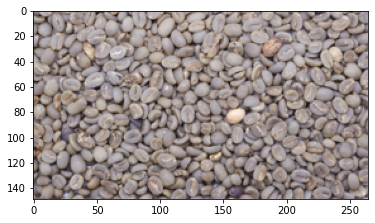

In [0]:
plt.imshow(image_list[20])

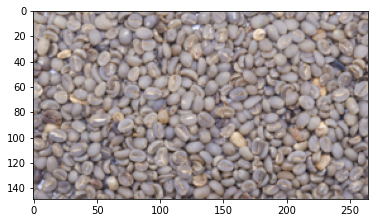

In [0]:
plt.imshow(image_list[200])

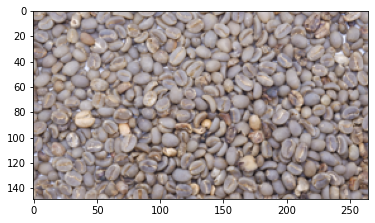

In [0]:
plt.imshow(image_list[400])

# Color Histogram

<function matplotlib.pyplot.show>

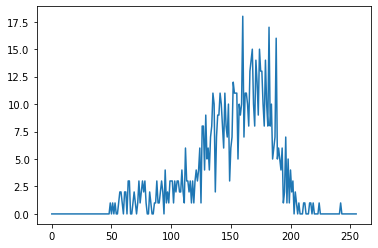

In [0]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [0], None, [256], [0,256])
plt.plot(histr)
plt.show

In [0]:
np.histogram(histr)

(array([140,  41,  14,  15,  10,  15,  10,   6,   3,   2]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ],
       dtype=float32))

In [0]:
def getColorHistogram(rgb_image):
  colHist = cv2.calcHist(rgb_image, [0], None, [256], [0,256])
  (hist, _) = np.histogram(colHist, bins=256, )
  return hist, colHist

In [0]:
listColHist = [] #list Color Histogram
listImgHist = [] #list image Color Histogram
for image in arrayImages:
  chist, img = getColorHistogram(image)
  listColHist.append((chist))
  listImgHist.append(img)
print("Jumlah Citra: ", len(listColHist))

Jumlah Citra:  540


In [0]:
len(listColHist[10])

256

In [0]:
listColHist[10]

array([108,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  27,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  24,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  11,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  12,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  10,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

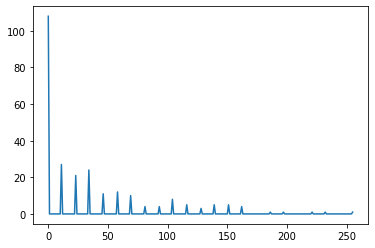

In [0]:
plt.plot(listColHist[10])

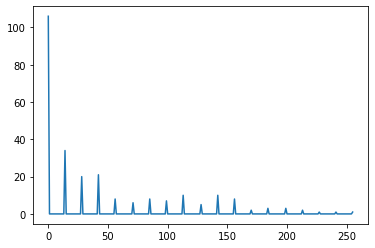

In [0]:
plt.plot(listColHist[200])

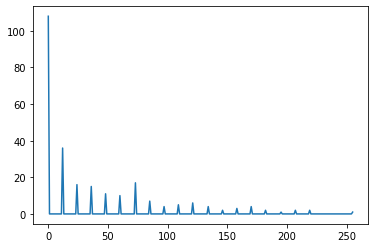

In [0]:
plt.plot(listColHist[400])

In [0]:
(listImgHist[0]).shape

(256, 1)

<function matplotlib.pyplot.show>

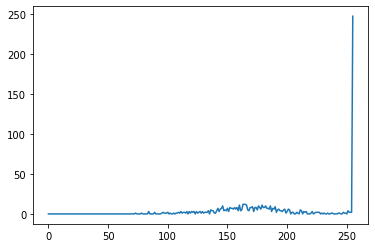

In [0]:
plt.plot(listImgHist[0])
plt.show

<function matplotlib.pyplot.show>

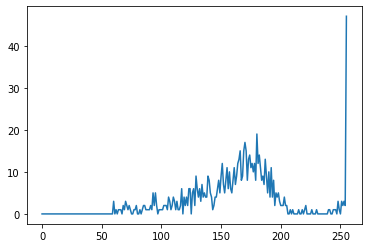

In [0]:
plt.plot(listImgHist[5])
plt.show

<function matplotlib.pyplot.show>

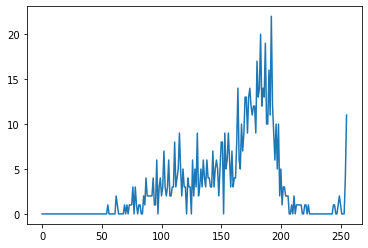

In [0]:
plt.plot(listImgHist[10])
plt.show

<function matplotlib.pyplot.show>

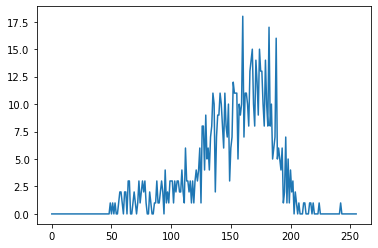

In [0]:
plt.plot(listImgHist[200])
plt.show

<function matplotlib.pyplot.show>

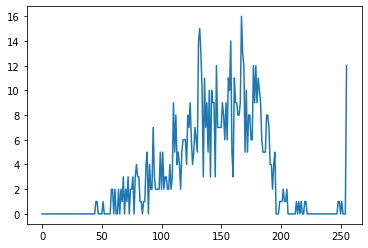

In [0]:
plt.plot(listImgHist[450])
plt.show

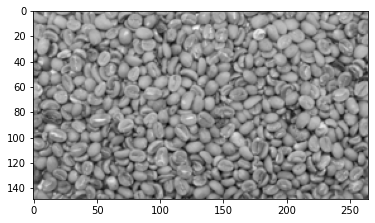

In [0]:
# Coba graycalling

imgGray1 = cv2.cvtColor(arrayImages[200], cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray1, cmap="gray")

In [0]:
grayImages = arrayImages #the array images for grayscalling list

In [0]:
grayImages[2].flatten()

array([255, 255, 255, ..., 234, 236, 250], dtype=uint8)

In [0]:
#nnti coba dlu pake satu gambar atau satu indeks ajah dlu

def getLBPimage(gray_image): #asalnya gray_image
  
  #input gray image = color image of shape(height, width)

  #output img: LBP converted image of the same shape as

  #step 0: step 0, Convert image to grayscall but already done
  #using the grayscalling = [] before the LBP

  #LBPimages = []
  
  #kalau img_gray gak bisa coba pakek image_list
  #grayscalling the image in index first
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  imgLBP = np.zeros_like(grayscalling)
  neighboor = 3 

  for imgHeight in range(0,gray_image.shape[0] - neighboor):
    for imgWidth in range(0,gray_image.shape[1] - neighboor):

      # Step1: 3 by 3 pixel
      # image_list = np.asarray(image_list)
      img           = grayscalling[imgHeight:imgHeight+neighboor, imgWidth:imgWidth+neighboor]
      center        = img[1,1]
      img01         = (img >= center)*1.0
      img01_vector  = img01.T.flatten() #make array become flat in one line (vector)

      # it is ok to order counterclock manner
      # img01_vector = img01.flatten()

      # Step 2: *Binary Operation
      img01_vector = np.delete(img01_vector,4)

      # Step 3 : Decimal: Convert the binary operated values to a digit
      where_img01_vector = np.where(img01_vector)[0]
      if len(where_img01_vector) >= 1:
        num = np.sum(2**where_img01_vector)
      else:
        num = 0
      imgLBP[imgHeight+1, imgWidth+1] = num
  
  return imgLBP



# LBP Using Library

In [0]:
from skimage.feature import local_binary_pattern
def getLBPimageScikit(gray_image):
  p = 8
  r = 1
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(grayscalling, p, r, method = 'default')
  n_bins = int(lbp.max() + 1)
  (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
  return hist, lbp

In [0]:
listHistLBP = []
listImgLBP = []
for image in arrayImages:
    hist, img = getLBPimageScikit(image)
    listHistLBP.append((hist))
    listImgLBP.append(img)
print("Jumlah Citra: ", len(listHistLBP))

Jumlah Citra:  540


In [0]:
len(listHistLBP[0])

256

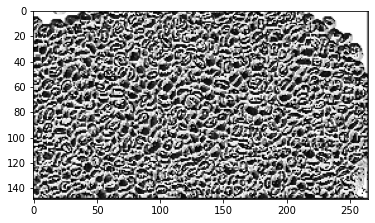

In [0]:
plt.imshow(listImgLBP[0], cmap="gray")

# Random Forrest Classifier

In [0]:
# coba satuin list histogram LBP sama Histogram Color
imagesHist = listColHist, listHistLBP

In [0]:
imagesHist

### Only Using LBP Parameter

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

ValueError: ignored

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.7988826815642458


### Try Only using Histogram Parameter

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.46368715083798884


# KNN Classifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.8324022346368715


### parameter histogram

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listColHist, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.48044692737430167


# SVM Classifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn import svm
clf = svm.SVC(gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [0]:
from sklearn import metrics
print("Accuracy SVM: ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVM:  0.3016759776536313
